# GUI feature in Open CV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 1. Module Image file reading and writing
* Read and Write image
* cv.imread(filename) : read image from file , colorspace BGR
* cv.imwrite(filename,image) : save image to a file, colorspace BGR
* Note: matplotlib have colorspace RGB
* If use matplotlib to show image loaf by cv, remember to change color RGB colormap
* cv.imwrite auto change from bgr to rgb while save, remember to change colormap rgb back to bgr if use cv.imwrite

<class 'numpy.ndarray'>


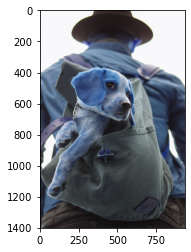

In [47]:
# matplotlib
img = cv2.imread('DATA/raw/dog_backpack.jpg')
plt.imshow(img)
print(type(img))

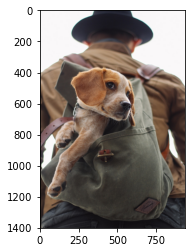

In [48]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [49]:
cv2.imwrite('DATA/proccessed/dog_backpack_1.jpg',img)
cv2.imwrite('DATA/proccessed/dog_backpack_2.jpg',img_rgb)

True

In [50]:
cv2.imwrite('DATA/proccessed/dog_backpack_3.jpg',cv2.cvtColor(img_rgb,cv2.COLOR_RGB2BGR))

True

## 2. Module Image Proccessing

* Drawing Funtion : draw on image
* Image Filtering : Filter on Image
* Color Sapce Conversion and colormap : Change colorspace
* Feature Detection : Find feature of soucrce on destination
* Object Detect by template matching: Find source pic on destination pic
* Geometric Image Transformation: Mathematical Transform on Image
* And still many others

### 2.1 Drawing funtion
* cv2.arrowdLine(img,pt1,pt2,color,thickness) : draw arrow
* cv2.circle(img,center,radius,color,thickness) : draw circle
* cv2.rectangle(img,pt1,pt2,color,thickness) : Draw rectangle
* cv2.line(img,pt1,pt2,color,thickness): draw lines
* cv2.polylines(img,[pts],isClosed,color,thickness)
* cv2.putText(img,text,org,fontFace,fontScale,thickness,color,lineType=cv2.LINE_AA)
* cv2.fillPolys(img,[pts],colors)
* cv2.drawContours(): draw contours

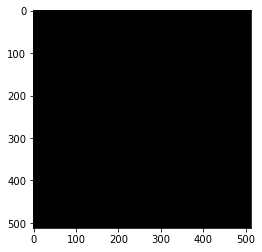

In [6]:
# create blank img
blank_img = np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(blank_img)

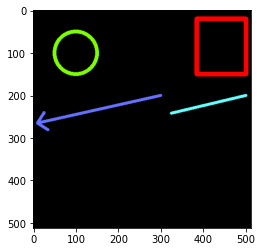

In [7]:
# Draw rectangle 
cv2.rectangle(blank_img,pt1=(384,20),pt2=(500,150),color=(255,0,0),thickness=10)
cv2.circle(img=blank_img,center=(100,100),radius=50,color=(125,255,0),thickness=8)
cv2.line(blank_img,pt1=(500,200),pt2=(324,242),color=(102,255,255),thickness=5)
cv2.arrowedLine(blank_img,pt1=(300,200),pt2=(10,265),color=(102,113,255),thickness=5)
plt.imshow(blank_img)

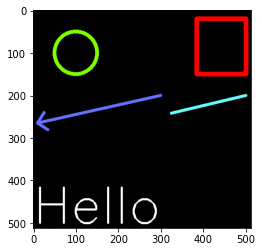

In [8]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(blank_img,text='Hello',org=(0,500),fontFace=font,fontScale=4,
            thickness=3,color=(255,255,255),lineType=cv2.LINE_AA)
plt.imshow(blank_img)

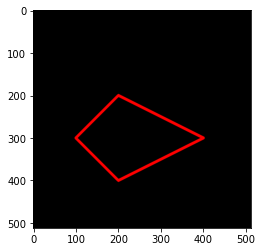

In [9]:
# polygon
blank_img = np.zeros(shape=(512,512,3),dtype=np.int32)
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
pts = vertices.reshape((-1,1,2)) # chagng to 3 dim
cv2.polylines(blank_img,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(blank_img)

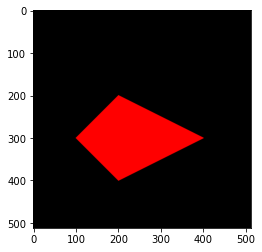

In [10]:
# draw fill-in polygon
blank_img = np.zeros(shape=(512,512,3),dtype=np.int32)
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
pts = vertices.reshape((-1,1,2)) # chagng to 3 dim
cv2.fillPoly(blank_img,[pts],color=(255,0,0))
plt.imshow(blank_img)

### 2.2: Colorspace Conversion and colormap
* cv2.cvtColor()


In [51]:
img = cv2.cvtColor(cv2.imread('DATA/raw/dog_backpack.jpg'),cv2.COLOR_BGR2GRAY)

  
# Window name in which image is displayed
window_name = 'image'
  
# Using cv2.imshow() method 
# Displaying the image 
cv2.imshow(window_name, img)
  
#waits for user to press any key 
#(this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0) 
  
#closing all open windows 
cv2.destroyAllWindows() 

### 2.3 Image Filtering
* cv2.blur()
* cv2.dilate()
* cv2.erode()
* cv2.medianBlur()
* cv2.GaussianBlur()

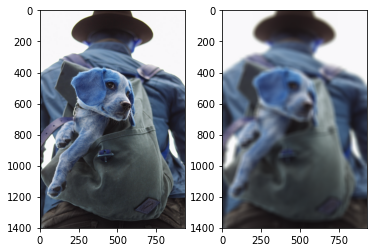

In [12]:
img = cv2.imread('DATA/raw/dog_backpack.jpg')
blur = cv2.blur(img,ksize=(30,30))
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(blur)

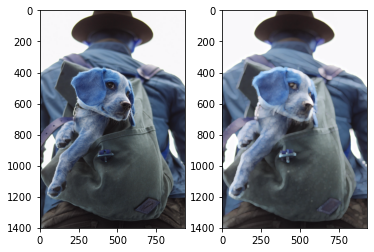

In [13]:
img = cv2.imread('DATA/raw/dog_backpack.jpg')
kernel = np.ones((10, 10), 'uint8')
blur = cv2.dilate(img,kernel=kernel)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(blur)

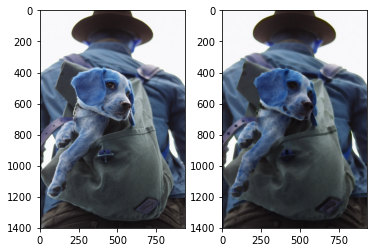

In [14]:
img = cv2.imread('DATA/raw/dog_backpack.jpg')
kernel = np.ones((10, 10), 'uint8')
blur = cv2.erode(img,kernel=kernel)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(blur)

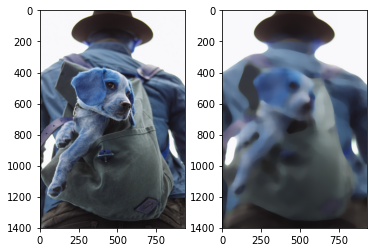

In [15]:
img = cv2.imread('DATA/raw/dog_backpack.jpg')
blur = cv2.medianBlur(img,ksize=55) #ksize must be odd int
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(blur)

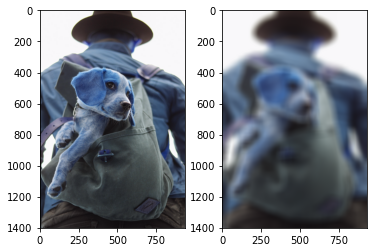

In [16]:
img = cv2.imread('DATA/raw/dog_backpack.jpg')
blur = cv2.GaussianBlur(img,ksize=(55,55),sigmaX=100,sigmaY=100) #ksize must be odd int
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(blur)

### 2.4 Feature Detection
* cv2.cornerHarris()
* cv2.goodFeaturesToTrack()
* cv2.Canny()
* cv2.HoughLinesP()
* cv2.HoughCircles()

#### 2.4.1 Corner Detection with Corner Harris and Shi Tomashi
* cv2.cornerHarris() : corner Harris for corner detection
* cv2.goodFeaturesToTrack() : Shi-Tomashi for corner detecction

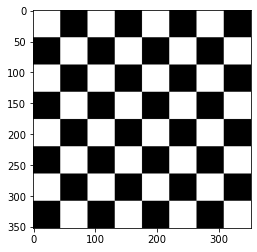

In [17]:
flat_chess = cv2.imread('DATA/raw/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

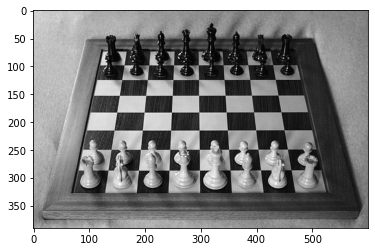

In [18]:
real_chess = cv2.imread('DATA/raw/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

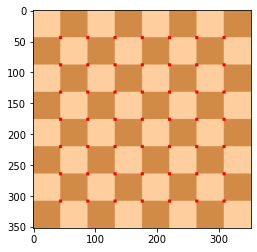

In [19]:
gray = np.float32(gray_flat_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None) # a denoise method which connect separate detail
flat_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(flat_chess)

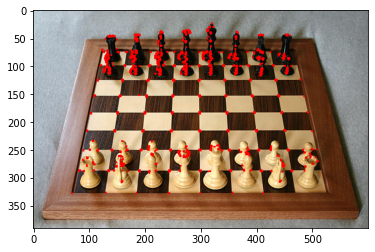

In [20]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)
real_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(real_chess)

In [21]:
flat_chess = cv2.imread('DATA/raw/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
real_chess = cv2.imread('DATA/raw/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

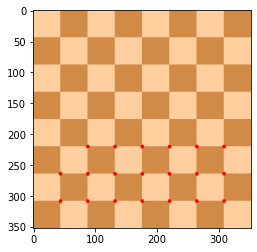

In [22]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,20,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)
plt.imshow(flat_chess)

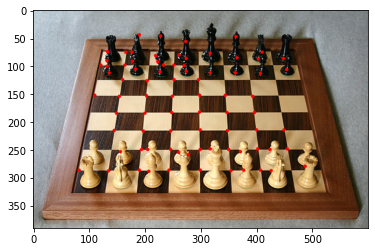

In [23]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)
plt.imshow(real_chess)

#### 2.4.2: Edge detection with Canny
* cv2.Canny()

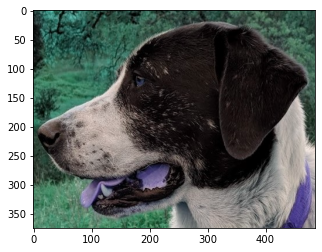

In [24]:
img = cv2.imread('DATA/raw/sammy_face.jpg')
plt.imshow(img)

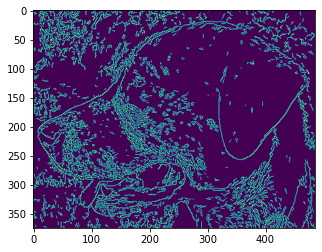

In [25]:
edges = cv2.Canny(image=img,threshold1 = 127, threshold2=199)
plt.imshow(edges)

* Tuning threshold is very initutive, another method for chosing threshold is blur the image before egde detect and choose the threshold base on median

In [26]:
med_val = np.median(img)
med_val

64.0

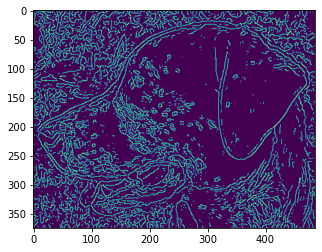

In [27]:
lower = int(max(0,0.7*med_val))
upper = int(min(255,0.7*med_val))
blurred_img = cv2.blur(img,ksize=(5,5))
edges = cv2.Canny(image=blurred_img,threshold1 = lower, threshold2=upper)
plt.imshow(edges)

#### 2.4.3: Circle and line detect with Hough

#### 2.4.3.1: Line detect with Hough

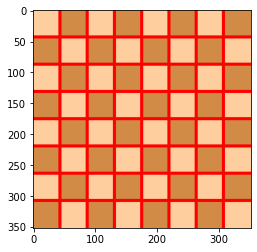

In [28]:
flat_chess = cv2.imread('DATA/raw/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_flat_chess, 50, 200)
lines = cv2.HoughLinesP(edges, rho=1, theta = np.pi/180,threshold=10, minLineLength=10, maxLineGap=250)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(flat_chess, (x1, y1), (x2, y2), (255, 0, 0), 3)
plt.imshow(flat_chess)

#### 2.4.3.2: Circle detect with Hough

In [29]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [30]:
'''
cv::HoughModes {
  cv::HOUGH_STANDARD = 0,
  cv::HOUGH_PROBABILISTIC = 1,
  cv::HOUGH_MULTI_SCALE = 2,
  cv::HOUGH_GRADIENT = 3
}
'''

'\ncv::HoughModes {\n  cv::HOUGH_STANDARD = 0,\n  cv::HOUGH_PROBABILISTIC = 1,\n  cv::HOUGH_MULTI_SCALE = 2,\n  cv::HOUGH_GRADIENT = 3\n}\n'

In [31]:
sep_coin = cv2.imread('DATA/raw/many_circles.png')
gray_sep_coin = cv2.cvtColor(sep_coin,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.medianBlur(gray_sep_coin,ksize=255)

In [32]:
med_val = np.median(gray_blur)
upper = int(min(255,0.7*med_val))

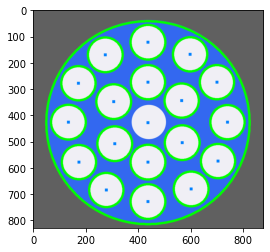

In [33]:
sep_coin = cv2.imread('DATA/raw/many_circles.png')
gray_sep_coin = cv2.cvtColor(sep_coin,cv2.COLOR_BGR2GRAY)
# gray_blur = cv2.medianBlur(gray_sep_coin,ksize=255)
circles = cv2.HoughCircles(gray_sep_coin, cv2.HOUGH_GRADIENT, dp =1, minDist=50,param1=10,param2=70)
circles
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(sep_coin, (x, y), r, (0, 255, 0), 8)
		cv2.rectangle(sep_coin, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

plt.imshow(sep_coin)

### 2.4.4 Object detection by template matching
* cv2.matchTemplate()

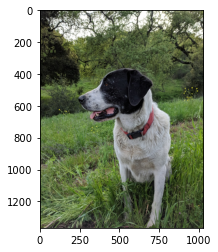

In [34]:
full = cv2.imread('DATA/raw/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

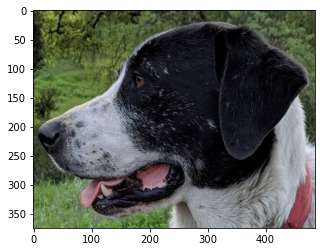

In [35]:
face = cv2.imread('DATA/raw/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [36]:
# List of template matching algorithm
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

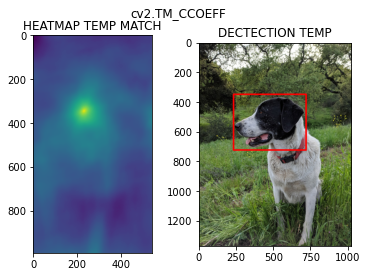

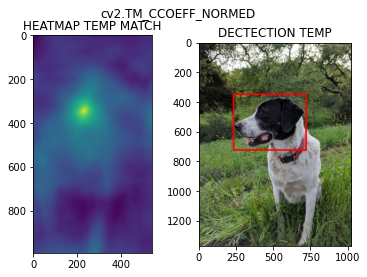

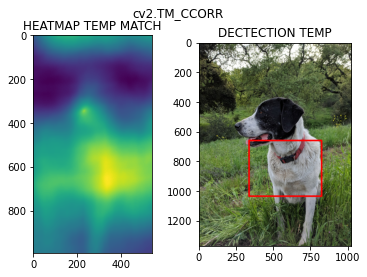

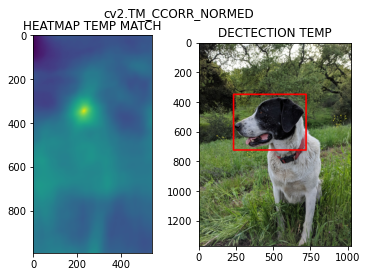

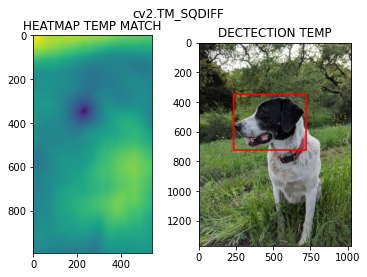

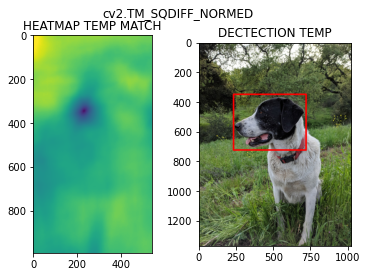

In [37]:
for m in methods:

    # Create copy of image so we not mess up the original
    full_copy = full.copy()
    method = eval(m) # use eval to change string to same name funtion/mehod

    #template matching
    # find the top left point of small picture in big picture
    res = cv2.matchTemplate(full_copy,face,method)
    # return the heatmap of template matching in array
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res) #find global max,min in array

    # with SQDIFF algorithm , the topeleft is the smallest value elss i is highest
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height,width,channel = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #plot and show
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP TEMP MATCH')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DECTECTION TEMP')
    plt.suptitle(m)

    plt.show()


### 2.5 : Geomatric image transformation
* cv2.resize()


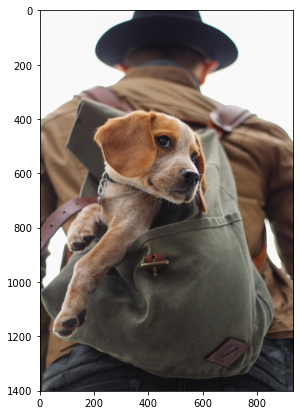

In [38]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(122)
ax.imshow(img_rgb)

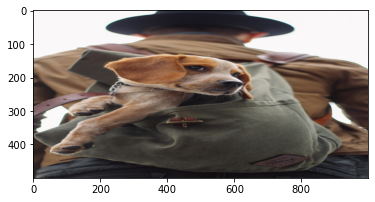

In [39]:
#resize img
new_img=cv2.resize(img_rgb,(1000,500)) #1000 replace for 934 and 500 replace to 1000
plt.imshow(new_img)

## 3. Module High-Level Gui
* cv2.imshow() : show cv loaded image on separate window
* cv2.destroyAllWindows(): clear all window after running to avoid conflict
* cv2.namedWindow(): namw the window
* cv2.resizeWindow(): resize the window
* cv2.waitKey(): wait key inside window to delay between each event
* cv2.setMouseCallback(): contact with mouse

### 3.1: Show image on separate window

In [52]:
# better method to avoid many unknow error, should use .py script
img = cv2.imread('DATA/raw/sammy_face.jpg')

while True:
    cv2.imshow('DATA/raw/sammy_face.jpg',img)
    if cv2.waitKey(1) & 0xFF == ord('s'): # press s to save after 1ms
        cv2.imwrite("DATA/proccessed/omg.png", img)
    if cv2.waitKey(1) & 0xFF == ord('q'): # press q to quit after 1ms
        break
cv2.destroyAllWindows()

### 3.2 Draw on image in separate window

In [53]:
# Draw with mouse on separate window
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN: # click left mouse down
        cv2.circle(blank_img,(x,y),radius=100,color=(0,255,0),thickness=-1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(blank_img,(x,y),radius=100,color=(255,0,0),thickness=-1)

# connect drawing function to the window
cv2.namedWindow(winname='my_drawing')

cv2.setMouseCallback('my_drawing',draw_circle)

blank_img = np.zeros((512,512,3),dtype=np.int8)
while True:
    cv2.imshow('my_drawing',blank_img)
    # cv2.resizeWindow('my_drawing',50,50)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

In [57]:
# we have 'clicking draw above' what about 'dragging draw'

# VARIABLE
drawing = False
ix = -1
iy = -1
def draw_rectangle(event,x,y,flags,param):
    global ix,iy,drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy=x,y
    
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(blank_img,(ix,iy),(x,y),(0,255,0),-1)
    
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(blank_img,(ix,iy),(x,y),(0,255,0),-1)
# connect drawing function to the window
cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback('my_drawing',draw_rectangle)


blank_img = np.zeros((512,512,3),dtype=np.int8)
while True:
    cv2.imshow('my_drawing',blank_img)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

## 4. Module Video I/O
* cv2.VideoCapture()
* cv2.VideoWriter()

### 4.1: Connect to bult-in cam, capture video and save it

In [56]:
cap = cv2.VideoCapture(0) # capture the default webcam

# to fully capture
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# fourcc is video codec, for window use *'DVIX' as paraeter
# mac and linux use *'XVID'
writer = cv2.VideoWriter('DATA/proccessed/myvideo.mp4',cv2.VideoWriter_fourcc(*'DVIX'),20,(width,height))

while True:
    ret,frame = cap.read()
    # operation
    writer.write(frame)
    # gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',frame)

    if cv2.waitKey(1)& 0xFF == ord('q'):
        break
cap.release()
writer.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### 4.2 Open video file

In [44]:
import time

cap = cv2.VideoCapture('DATA/proccessed/myvideo.mp4')

if cap.isOpened() == False:
    print('FILE NOT FOUND OR WRONG CODEC')

while cap.isOpened():

    ret,frame = cap.read()

    if ret == True:
        time.sleep(1/10) # 20FPS framerate
        cv2.imshow('frame',frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    else:
        break

cap.release()
cv2.destroyAllWindows()

FILE NOT FOUND OR WRONG CODEC


### 4.3: Draw on camera

In [45]:
# drawing with mouse
cap = cv2.VideoCapture(0) # capture the default webcam


## Callback funtion
def draw_rectangle(event,x,y,flags,param):
    global pt1,pt2,topLeft_clicked,botRight_clicked
    if event == cv2.EVENT_LBUTTONDOWN:

        # Erase rectangle
        if topLeft_clicked and botRight_clicked:
            pt1 = (0,0)
            pt2 = (0,0)
            topLeft_clicked = False
            botRight_clicked = False
        
        if topLeft_clicked == False:
            pt1 = (x,y)
            topLeft_clicked = True
        
        elif botRight_clicked == False:
            pt2 = (x,y)
            botRight_clicked = True

    pass
## Global variable
pt1 = (0,0)
pt2 = (0,0)
topLeft_clicked = False
botRight_clicked = False

## connect to callback
cv2.namedWindow('Test')
cv2.setMouseCallback('Test',draw_rectangle)

while True:
    ret,frame = cap.read()
    # operation
    if topLeft_clicked:
        cv2.circle(frame,center = pt1, radius = 2,color=(0,0,255),thickness=-1)
    if topLeft_clicked and botRight_clicked:
        cv2.rectangle(frame,pt1,pt2,(0,0,255),3)

    cv2.imshow('Test',frame)

    if cv2.waitKey(1)& 0xFF == ord('q'):
        break
cap.release()

cv2.destroyAllWindows()

## 5. Module Core Functionality
* Operation On Arrays


### Operation On Arrays
* cv2.flip()
* class: PCA
* class : SVD

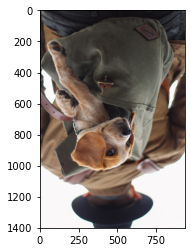

In [46]:
flip = cv2.flip(img_rgb,0)
plt.imshow(flip)